## Preparando el dataset para clustering

In [1]:
import dask.dataframe as dd
import pandas as pd

In [2]:
import viajes_apr_dtypes

viajes_04 = dd.read_csv('viajes202204_clean/*', dtype=viajes_apr_dtypes.dtypes)

In [3]:
viajes_04_new = viajes_04[viajes_04['proposito']!='SINBAJADA']

In [96]:
len(viajes_04_new)

12415528

In [ ]:
viajes_04_new.head(1000).to_csv('viajes_04_new.csv')

In [ ]:
viajes_04.columns

Index(['netapa', 'netapassinbajada', 'ultimaetapaconbajada', 'tviaje_seg',
       'tviaje_min', 'dviajeeuclidiana_mts', 'dviajeenruta_mts',
       'paraderosubida', 'paraderobajada', 'comunasubida', 'comunabajada',
       'diseno777subida', 'diseno777bajada', 'tiemposubida', 'tiempobajada',
       'periodosubida', 'periodobajada', 'tipodia', 'mediahora',
       'factorexpansion', 'tiempomediodeviaje', 'periodomediodeviaje',
       'tipodiamediodeviaje', 't_1era_etapa', 'd_1era_etapa',
       'tespera_1era_etapa', 'ttrasbordo_1era_etapa', 'tcaminata_1era_etapa',
       'dtransbordo_1era_etapa', 't_2da_etapa', 'd_2da_etapa',
       'tespera_2da_etapa', 'ttrasbordo_2da_etapa', 'tcaminata_2da_etapa',
       'dtransbordo_2da_etapa', 't_3era_etapa', 'd_3era_etapa',
       'tespera_3era_etapa', 'ttrasbordo_3era_etapa', 'tcaminata_3era_etapa',
       'dtransbordo_3era_etapa', 't_4ta_etapa', 'd_4ta_etapa', 'op_1era_etapa',
       'op_2da_etapa', 'op_3era_etapa', 'op_4ta_etapa', 'serv_1era_etapa

In [4]:
# Atributos relevantes
rel_cols = ['netapa',
'netapassinbajada',
'ultimaetapaconbajada',
'tviaje_min',
'dviajeeuclidiana_mts',
'dviajeenruta_mts',
'paraderosubida',
'paraderobajada',
'comunasubida',
'comunabajada',
'mediahora',
'factorexpansion',
't_1era_etapa',
'd_1era_etapa',
#'tespera_1era_etapa',
'ttrasbordo_1era_etapa',
#'tcaminata_1era_etapa',
'dtransbordo_1era_etapa',
't_2da_etapa',
'd_2da_etapa',
#'tespera_2da_etapa',
'ttrasbordo_2da_etapa',
#'tcaminata_2da_etapa',
'dtransbordo_2da_etapa',
't_3era_etapa',
'd_3era_etapa',
#'tespera_3era_etapa',
'ttrasbordo_3era_etapa',
#'tcaminata_3era_etapa',
'dtransbordo_3era_etapa',
't_4ta_etapa',
'd_4ta_etapa',
'paraderosubida_1era',
'paraderosubida_2da',
'paraderosubida_3era',
'paraderosubida_4ta',
'paraderobajada_1era',
'paraderobajada_2da',
'paraderobajada_3era',
'paraderobajada_4ta',
'tipotransporte_1era',
'tipotransporte_2da',
'tipotransporte_3era',
'tipotransporte_4ta',
'tviaje_en_vehiculo_min']

In [ ]:
viajes_04_new[rel_cols].to_csv('viajes_04_rel.csv', index=False)

In [5]:
viajes_04_cluster=viajes_04_new[viajes_04_new['proposito']=='TRABAJO'][rel_cols]

In [105]:
len(viajes_04_cluster)

4573614

In [122]:
len(viajes_04_cluster)

4573614

In [ ]:
viajes_04_cluster['comunasubida'].head()

3             PUDAHUEL
9             SANTIAGO
11          LA PINTANA
15    ESTACION CENTRAL
20               MAIPU
Name: comunasubida, dtype: object

In [115]:
comunas = paraderos['comuna'].unique().tolist()
com_type = pd.CategoricalDtype(categories=comunas, ordered=False)

In [110]:
periods = viajes_04_cluster['mediahora'].unique().compute()
periods_l = periods.tolist()

In [ ]:
periods_l.sort()
periods_l

In [112]:
period_type = pd.CategoricalDtype(categories=periods_l, ordered=True)

In [113]:
medios = viajes_04_cluster['tipotransporte_1era'].unique().compute().tolist()
medio_type = pd.CategoricalDtype(categories=medios, ordered=True)

In [ ]:
viajes_04_cluster.to_csv('viajes_04_cluster.csv', index=False)

In [6]:
#viajes_04_cluster.compute().head(1000000).to_csv('viajes_04_cluster_1M.csv', index=False)
viajes_04_cluster.compute().head(100000).to_csv('viajes_04_cluster_100k.csv', index=False)

In [22]:
viajes_04_cluster.compute().to_csv('viajes_04_cluster.csv', index=False)

In [12]:
viajes_04_cluster.compute().head(1000000).to_csv('viajes_04_cluster_1M.csv', index=False)

In [127]:
cat_dtypes = {
'comunasubida': com_type,
'comunabajada': com_type,
'mediahora': period_type,
'tipotransporte_1era': medio_type,
'tipotransporte_2da': medio_type,
'tipotransporte_3era': medio_type,
'tipotransporte_4ta': medio_type,
'x_subida': 'int64',
'y_subida': 'int64',
'x_bajada': 'int64',
'y_bajada': 'int64'}

In [117]:
com_type

CategoricalDtype(categories=['MAIPU', 'INDEPENDENCIA', 'CONCHALI', 'RECOLETA',
                  'QUILICURA', 'HUECHURABA', 'PROVIDENCIA', 'RENCA',
                  'PUDAHUEL', 'ESTACION CENTRAL', 'LO PRADO', 'SANTIAGO',
                  'CERRO NAVIA', 'QUINTA NORMAL', 'CERRILLOS', 'NUNOA',
                  'VITACURA', 'LO BARNECHEA', 'LAS CONDES', 'LA REINA',
                  'PENALOLEN', 'SAN MIGUEL', 'SAN JOAQUIN', 'LA GRANJA',
                  'LA FLORIDA', 'LA PINTANA', 'EL BOSQUE', 'PUENTE ALTO',
                  'SAN BERNARDO', 'SAN RAMON', 'LA CISTERNA',
                  'PEDRO AGUIRRE CERDA', 'LO ESPEJO', 'MACUL'],
, ordered=False)

In [119]:
medio_type

CategoricalDtype(categories=['METRO', 'BUS', 'ZP', 'METROTREN'], ordered=True)

In [50]:
viajes_04_cluster.describe()

NameError: name 'viajes_04_cluster' is not defined

In [1]:
import viajes_04_cat_types
import pandas as pd

In [16]:
viajes_04_cl = pd.read_csv('viajes_04_cluster_100k.csv', dtype=viajes_04_cat_types.dtypes, low_memory=False)

In [63]:
viajes_04_cl[['tviaje_min']].describe()

,netapa,netapassinbajada,ultimaetapaconbajada,tviaje_min,dviajeeuclidiana_mts,dviajeenruta_mts,factorexpansion,t_1era_etapa,d_1era_etapa,ttrasbordo_1era_etapa,...,d_2da_etapa,ttrasbordo_2da_etapa,dtransbordo_2da_etapa,t_3era_etapa,d_3era_etapa,ttrasbordo_3era_etapa,dtransbordo_3era_etapa,t_4ta_etapa,d_4ta_etapa,tviaje_en_vehiculo_min
count,100000.000000,100000.000000,100000.0,100000.000000,1.000000e+05,97620.000000,100000.000000,97738.000000,100000.000000,27925.000000,...,30187.000000,3002.000000,3002.000000,3129.000000,3138.000000,49.000000,49.000000,58.000000,58.000000,100000.000000
mean,1.333850,0.024070,1.0,29.413381,1.022590e+04,10275.652079,1.359640,20.296563,7372.939590,5.080985,...,8938.617120,8.445270,119.743732,15.479201,4504.417463,8.407822,126.459443,14.855174,4586.431034,26.925274
std,0.536281,0.155083,0.0,20.351515,1.036150e+05,6788.153769,0.166957,13.880559,5981.291464,4.875159,...,6376.914465,6.806342,103.839902,12.969573,4459.130293,6.878697,120.127584,13.705514,4391.704445,17.489802
min,1.000000,0.000000,1.0,0.000000,0.000000e+00,-47238.000000,0.000000,0.000000,-52793.000000,-21.400000,...,-47515.000000,-20.016700,0.000000,0.000000,-50225.000000,-1.433300,4.242600,1.033300,473.000000,0.000000
25%,1.000000,0.000000,1.0,14.583300,4.285144e+03,4964.000000,1.266100,9.866700,2850.000000,2.100000,...,3691.000000,3.616700,47.095600,6.233300,1670.000000,3.966700,49.679000,5.420825,1482.000000,13.850000
50%,1.000000,0.000000,1.0,25.466700,7.583094e+03,9140.000000,1.324200,17.866700,6096.500000,3.266700,...,8032.000000,7.333300,86.165500,12.283300,3348.000000,6.600000,81.344900,9.341700,3118.500000,23.950000
75%,2.000000,0.000000,1.0,40.100000,1.176046e+04,14416.000000,1.419100,27.866700,10828.000000,6.316700,...,13165.500000,12.145825,188.281700,20.300000,6128.250000,11.083300,194.558500,22.837500,6087.000000,36.533300
max,5.000000,3.000000,1.0,237.000000,6.316216e+06,50456.000000,5.185600,147.550000,49790.000000,44.250000,...,37951.000000,40.033300,982.774100,110.300000,28671.000000,28.350000,630.149200,70.066700,19987.000000,160.550000


In [3]:
paraderos = pd.read_csv('paraderos.csv')

In [4]:
from gensim.utils import deaccent

paraderos['comuna'] = paraderos['comuna'].map(deaccent)
paraderos_new = paraderos[['parada/est.metro', 'diseno_777', 'x', 'y']]

In [17]:
viajes_04_cl_coord = (viajes_04_cl
                       .drop(columns=['paraderosubida_1era', 'paraderosubida_2da', 'paraderosubida_3era', 'paraderosubida_4ta', 'paraderobajada_1era', 'paraderobajada_2da', 'paraderobajada_3era', 'paraderobajada_4ta'])
                       .merge(paraderos_new[['parada/est.metro', 'x', 'y']], left_on='paraderosubida', right_on='parada/est.metro').drop(columns=['parada/est.metro'])
                       #.merge(paraderos_new[['parada/est.metro', 'x', 'y']], left_on='paraderosubida_1era', right_on='parada/est.metro', suffixes=(None, '_subida_1era')).drop(columns=['parada/est.metro'])
                       #.merge(paraderos_new[['parada/est.metro', 'x', 'y']], left_on='paraderosubida_2da', right_on='parada/est.metro', suffixes=(None, '_subida_2da')).drop(columns=['parada/est.metro'])
                       #.merge(paraderos_new[['parada/est.metro', 'x', 'y']], left_on='paraderosubida_3era', right_on='parada/est.metro', suffixes=(None, '_subida_3era')).drop(columns=['parada/est.metro'])
                       #.merge(paraderos_new[['parada/est.metro', 'x', 'y']], left_on='paraderosubida_4ta', right_on='parada/est.metro', suffixes=(None, '_subida_4ta')).drop(columns=['parada/est.metro'])
                       .merge(paraderos_new[['parada/est.metro', 'x', 'y']], left_on='paraderobajada', right_on='parada/est.metro', suffixes=('_subida', '_bajada')).drop(columns=['parada/est.metro'])
                       #.merge(paraderos_new[['parada/est.metro', 'x', 'y']], left_on='paraderobajada_1era', right_on='parada/est.metro', suffixes=(None, '_bajada_1era')).drop(columns=['parada/est.metro'])
                       #.merge(paraderos_new[['parada/est.metro', 'x', 'y']], left_on='paraderobajada_2da', right_on='parada/est.metro', suffixes=(None, '_bajada_2da')).drop(columns=['parada/est.metro'])
                       #.merge(paraderos_new[['parada/est.metro', 'x', 'y']], left_on='paraderobajada_3era', right_on='parada/est.metro', suffixes=(None, '_bajada_3era')).drop(columns=['parada/est.metro'])
                       #.merge(paraderos_new[['parada/est.metro', 'x', 'y']], left_on='paraderobajada_4ta', right_on='parada/est.metro', suffixes=(None, '_bajada_4ta')).drop(columns=['parada/est.metro'])
                       .drop(columns=['paraderosubida','paraderobajada'])
)

In [18]:
len(viajes_04_cl_coord)

10200

In [12]:
viajes_04_cl_coord.columns

Index(['netapa', 'netapassinbajada', 'ultimaetapaconbajada', 'tviaje_min',
       'dviajeeuclidiana_mts', 'dviajeenruta_mts', 'comunasubida',
       'comunabajada', 'mediahora', 'factorexpansion', 't_1era_etapa',
       'd_1era_etapa', 'tespera_1era_etapa', 'dtransbordo_1era_etapa',
       't_2da_etapa', 'd_2da_etapa', 'tespera_2da_etapa',
       'dtransbordo_2da_etapa', 't_3era_etapa', 'd_3era_etapa',
       'tespera_3era_etapa', 'dtransbordo_3era_etapa', 't_4ta_etapa',
       'd_4ta_etapa', 'tipotransporte_1era', 'tipotransporte_2da',
       'tipotransporte_3era', 'tipotransporte_4ta', 'tviaje_en_vehiculo_min',
       'x_subida', 'y_subida', 'x_bajada', 'y_bajada'],
      dtype='object')

In [110]:
viajes_04_cl_coord.head()

,netapa,netapassinbajada,ultimaetapaconbajada,tviaje_seg,dviajeeuclidiana_mts,dviajeenruta_mts,comunasubida,comunabajada,mediahora,factorexpansion,...,d_4ta_etapa,tipotransporte_1era,tipotransporte_2da,tipotransporte_3era,tipotransporte_4ta,tviaje_en_vehiculo_min,x_subida,y_subida,x_bajada,y_bajada
0,1,0,1,233.0,1778.6826,1780.0,SANTIAGO,SANTIAGO,09:30:00,1.3888,...,NaN,BUS,NaN,NaN,NaN,3.8833,346143,6298195,344528,6297684
1,2,0,1,2127.0,7495.8950,7610.0,MAIPU,SANTIAGO,10:00:00,1.2417,...,NaN,BUS,BUS,NaN,NaN,22.2667,338339,6294614,344884,6297756
2,1,0,1,535.0,2153.4646,2201.0,SANTIAGO,RECOLETA,06:00:00,1.5379,...,NaN,BUS,NaN,NaN,NaN,8.9167,346825,6298500,347074,6300662
3,1,0,1,1781.0,4436.6709,4441.0,ESTACION CENTRAL,SANTIAGO,07:30:00,1.6542,...,NaN,BUS,NaN,NaN,NaN,29.6833,342380,6296955,346552,6298256
4,1,0,1,980.0,4111.5791,4139.0,SAN MIGUEL,SANTIAGO,08:30:00,1.3812,...,NaN,BUS,NaN,NaN,NaN,16.3333,346748,6293774,346565,6297762


In [19]:
cat_columns = viajes_04_cl_coord.select_dtypes(['category']).columns
viajes_04_num = viajes_04_cl_coord.copy()
viajes_04_num[cat_columns] = viajes_04_num[cat_columns].apply(lambda x: x.cat.codes)
viajes_04_num = viajes_04_num.fillna(-1)


In [133]:
viajes_04_num.head()

,netapa,netapassinbajada,ultimaetapaconbajada,tviaje_min,dviajeeuclidiana_mts,dviajeenruta_mts,comunasubida,comunabajada,mediahora,factorexpansion,...,d_4ta_etapa,tipotransporte_1era,tipotransporte_2da,tipotransporte_3era,tipotransporte_4ta,tviaje_en_vehiculo_min,x_subida,y_subida,x_bajada,y_bajada
0,1,0,1,3.8833,1778.6826,1780.0,11,11,19,1.3888,...,-1.0,1,-1,-1,-1,3.8833,346143,6298195,344528,6297684
1,1,0,1,7.0833,1724.5802,1726.0,11,11,19,1.3888,...,-1.0,1,-1,-1,-1,7.0833,346143,6298195,344528,6297684
2,1,0,1,17.0500,2448.7241,3929.0,11,11,35,1.4131,...,-1.0,1,-1,-1,-1,17.0500,346251,6299460,344528,6297684
3,1,0,1,28.5167,7882.8882,9966.0,15,11,19,1.2496,...,-1.0,1,-1,-1,-1,28.5167,352269,6295998,344528,6297684
4,1,0,1,59.0333,7145.2759,11248.0,15,11,24,1.3266,...,-1.0,1,-1,-1,-1,59.0333,351468,6295557,344528,6297684


In [156]:
viajes_04_cl_coord.head()

,netapa,netapassinbajada,ultimaetapaconbajada,tviaje_seg,dviajeeuclidiana_mts,dviajeenruta_mts,comunasubida,comunabajada,mediahora,factorexpansion,...,d_4ta_etapa,tipotransporte_1era,tipotransporte_2da,tipotransporte_3era,tipotransporte_4ta,tviaje_en_vehiculo_min,x_subida,y_subida,x_bajada,y_bajada
0,1,0,1,233.0,1778.6826,1780.0,SANTIAGO,SANTIAGO,09:30:00,1.3888,...,NaN,BUS,NaN,NaN,NaN,3.8833,346143,6298195,344528,6297684
1,1,0,1,425.0,1724.5802,1726.0,SANTIAGO,SANTIAGO,09:30:00,1.3888,...,NaN,BUS,NaN,NaN,NaN,7.0833,346143,6298195,344528,6297684
2,1,0,1,1711.0,7882.8882,9966.0,NUNOA,SANTIAGO,09:30:00,1.2496,...,NaN,BUS,NaN,NaN,NaN,28.5167,352269,6295998,344528,6297684
3,1,0,1,256.0,1148.9238,1150.0,SANTIAGO,SANTIAGO,16:00:00,1.3138,...,NaN,BUS,NaN,NaN,NaN,4.2667,346143,6298195,345069,6297869
4,1,0,1,156.0,1160.6968,1161.0,SANTIAGO,SANTIAGO,13:30:00,1.3994,...,NaN,BUS,NaN,NaN,NaN,2.6000,346143,6298195,345069,6297869


## Clustering
Probamos algunos algoritmos de clustering

### KMeans

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

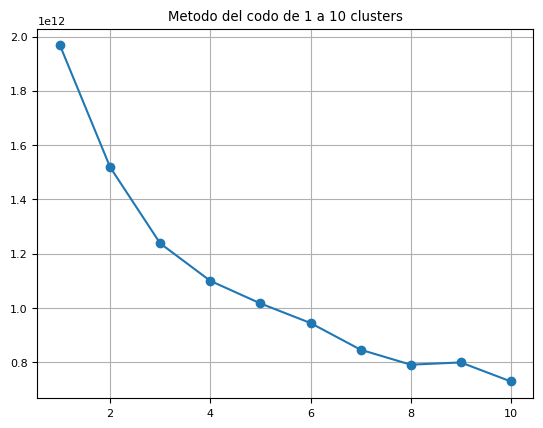

In [49]:
sse = []

clusters = list(range(1, 11))
for k in clusters:
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(mat)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 10 clusters")
plt.grid(True)
plt.show()

In [20]:
random_state=20
# Convert DataFrame to matrix
mat = viajes_04_num.values

In [11]:

# Using sklearn
km = KMeans(n_clusters=3, n_init='auto', random_state=random_state)
km.fit(mat)
# Get cluster assignment labels
labels = km.labels_


In [14]:
viajes_04_km = viajes_04_cl_coord
viajes_04_km['cluster'] = pd.Series(data=labels, index=viajes_04_cl_coord.index)

In [13]:
len(labels)

514928

In [19]:
viajes_04_km.head()

,netapa,netapassinbajada,ultimaetapaconbajada,tviaje_min,dviajeeuclidiana_mts,dviajeenruta_mts,comunasubida,comunabajada,mediahora,factorexpansion,...,tipotransporte_1era,tipotransporte_2da,tipotransporte_3era,tipotransporte_4ta,tviaje_en_vehiculo_min,x_subida,y_subida,x_bajada,y_bajada,cluster
0,1,0,1,3.8833,1778.6826,1780.0,SANTIAGO,SANTIAGO,09:30:00,1.3888,...,BUS,NaN,NaN,NaN,3.8833,346143,6298195,344528,6297684,1
1,1,0,1,7.0833,1724.5802,1726.0,SANTIAGO,SANTIAGO,09:30:00,1.3888,...,BUS,NaN,NaN,NaN,7.0833,346143,6298195,344528,6297684,1
2,1,0,1,17.0500,2448.7241,3929.0,SANTIAGO,SANTIAGO,17:30:00,1.4131,...,BUS,NaN,NaN,NaN,17.0500,346251,6299460,344528,6297684,1
3,1,0,1,28.5167,7882.8882,9966.0,NUNOA,SANTIAGO,09:30:00,1.2496,...,BUS,NaN,NaN,NaN,28.5167,352269,6295998,344528,6297684,2
4,1,0,1,59.0333,7145.2759,11248.0,NUNOA,SANTIAGO,12:00:00,1.3266,...,BUS,NaN,NaN,NaN,59.0333,351468,6295557,344528,6297684,2


In [15]:
viajes_04_km.to_csv('viajes_04_km_1M.csv', index=False)

### Agglomerative Clustering

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
# complete = linkage(mat, method="complete")
# single = linkage(mat, method="single")
# average = linkage(mat, method="average")
ward = linkage(mat, method="ward", random_state=random_state)

In [54]:
mat.shape

(10200, 33)

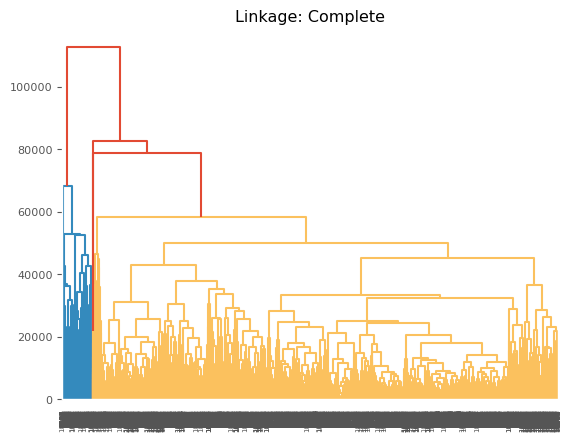

In [229]:
dendrogram(complete)
plt.title("Linkage: Complete")
plt.show()

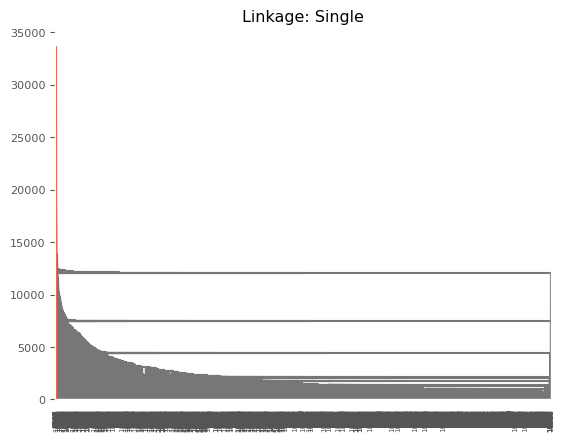

In [230]:
dendrogram(single)
plt.title("Linkage: Single")
plt.show()

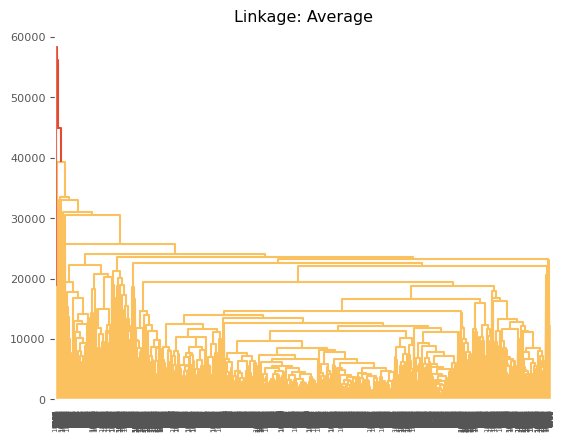

In [231]:
dendrogram(average)
plt.title("Linkage: Average")
plt.show()

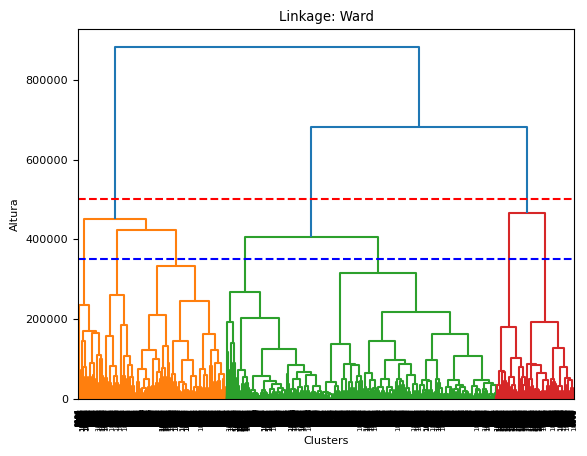

In [72]:
dendrogram(ward)
plt.title("Linkage: Ward")
plt.axhline(y=500000, color='r', linestyle='--')
plt.axhline(y=350000, color='b', linestyle='--')
plt.xlabel('Clusters')
plt.ylabel('Altura')
plt.show()

In [22]:
ward_3 = AgglomerativeClustering(n_clusters=3, linkage="ward", random_state=random_state).fit(mat)
ward_3.labels_

array([2, 2, 2, ..., 0, 2, 2])

In [23]:
viajes_04_ward = viajes_04_cl_coord
viajes_04_ward['cluster'] = pd.Series(data=ward_3.labels_, index=viajes_04_cl_coord.index)

In [24]:
viajes_04_ward.to_csv('viajes_04_ward_100k.csv', index=False)

### HDBSCAN

In [249]:
import hdbscan

clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40,
    metric='euclidean', min_cluster_size=60, min_samples=20, p=None)
clusterer.fit(mat)
#clusterer.labels_.tolist()

HDBSCAN(min_cluster_size=60, min_samples=20)

<Axes: ylabel='$\\lambda$ value'>

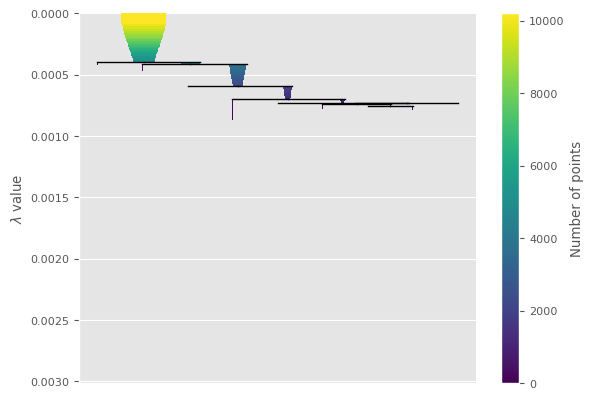

In [250]:
clusterer.condensed_tree_.plot()

In [243]:
pd.unique(clusterer.labels_)

array([ 1, -1,  0])

In [210]:
from sklearn.neighbors import NearestNeighbors
import plotly.express as px

neighbors = 10
nn = NearestNeighbors(n_neighbors=neighbors ).fit(mat)
distances, indices = nn.kneighbors(mat)
distance_desc = sorted(distances[:,neighbors-1], reverse=True)
px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc )

In [217]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc, # y values
                      S=1.0, #parameter suggested from paper
                      curve="convex", #parameter from figure
                      direction="decreasing") #parameter from figure

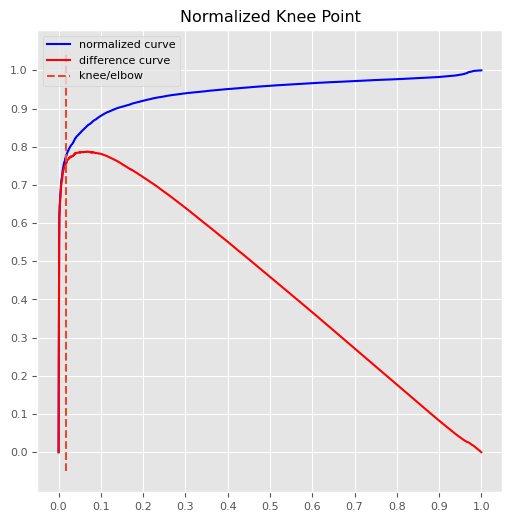

In [218]:
kneedle.plot_knee_normalized()

In [219]:
kneedle.knee_y

11395.516699973503

In [222]:
from sklearn.cluster import DBSCAN

clusterer = DBSCAN(eps = 11395.516699973503, min_samples=5)
clusterer.fit(mat)
pd.unique(clusterer.labels_)

array([ 0, -1])

In [201]:
clusterer.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [191]:
len(mat)

10200

In [189]:
clusterer.labels_.max()

332

# Resultados

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [74]:
## Acá podemos cambiar el csv segun el algoritmo

viajes_04_cl_coord = pd.read_csv('viajes_04_ward_100k.csv')
#viajes_04_cl_coord = viajes_04_ward

In [91]:
viajes_04_cl_coord.head()

,netapa,netapassinbajada,ultimaetapaconbajada,tviaje_seg,dviajeeuclidiana_mts,dviajeenruta_mts,comunasubida,comunabajada,mediahora,factorexpansion,...,tipotransporte_1era,tipotransporte_2da,tipotransporte_3era,tipotransporte_4ta,tviaje_en_vehiculo_min,x_subida,y_subida,x_bajada,y_bajada,cluster
0,1,0,1,233.0,1778.6826,1780.0,SANTIAGO,SANTIAGO,09:30:00,1.3888,...,BUS,NaN,NaN,NaN,3.8833,346143,6298195,344528,6297684,0
1,1,0,1,425.0,1724.5802,1726.0,SANTIAGO,SANTIAGO,09:30:00,1.3888,...,BUS,NaN,NaN,NaN,7.0833,346143,6298195,344528,6297684,0
2,1,0,1,1711.0,7882.8882,9966.0,NUNOA,SANTIAGO,09:30:00,1.2496,...,BUS,NaN,NaN,NaN,28.5167,352269,6295998,344528,6297684,4
3,1,0,1,256.0,1148.9238,1150.0,SANTIAGO,SANTIAGO,16:00:00,1.3138,...,BUS,NaN,NaN,NaN,4.2667,346143,6298195,345069,6297869,0
4,1,0,1,156.0,1160.6968,1161.0,SANTIAGO,SANTIAGO,13:30:00,1.3994,...,BUS,NaN,NaN,NaN,2.6000,346143,6298195,345069,6297869,0


In [174]:
viajes_04_cl_coord['mediahora'].unique()

['09:30:00', '16:00:00', '13:30:00', '10:30:00', '11:00:00', ..., '00:00:00', '19:00:00', '01:00:00', '20:30:00', '01:30:00']
Length: 35
Categories (44, object): ['00:00:00' < '00:30:00' < '01:00:00' < '01:30:00' ... '20:00:00' < '20:30:00' < '21:00:00' < '21:30:00']

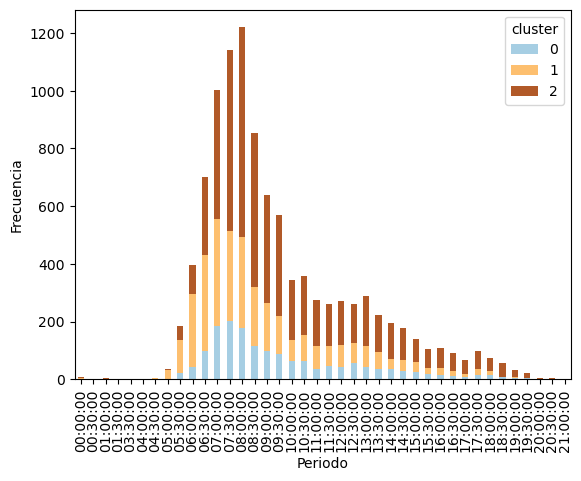

In [27]:
# Group the data by 'period' and 'group'
grouped_data = viajes_04_cl_coord.groupby(['mediahora', 'cluster']).size().unstack()

# Plot the stacked bar graph
ax = grouped_data.plot(kind='bar', stacked=True, colormap='Paired')

# Customize the plot
ax.set_xlabel('Periodo')
ax.set_ylabel('Frecuencia')
plt.rcParams.update({'font.size': 8})
# Show the plot
plt.show()

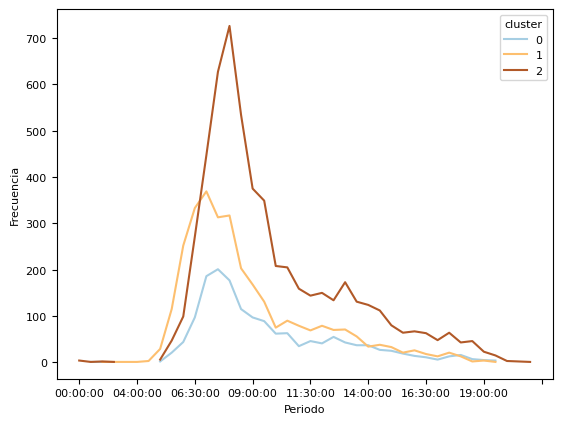

In [28]:
# Group the data by 'period' and 'group'
grouped_data = viajes_04_cl_coord.groupby(['mediahora', 'cluster']).size().unstack()

# Plot the stacked bar graph
ax = grouped_data.plot(colormap='Paired')

# Customize the plot
ax.set_xlabel('Periodo')
ax.set_ylabel('Frecuencia')
#plt.rcParams.update({'font.size': 9})
# Show the plot
plt.show()

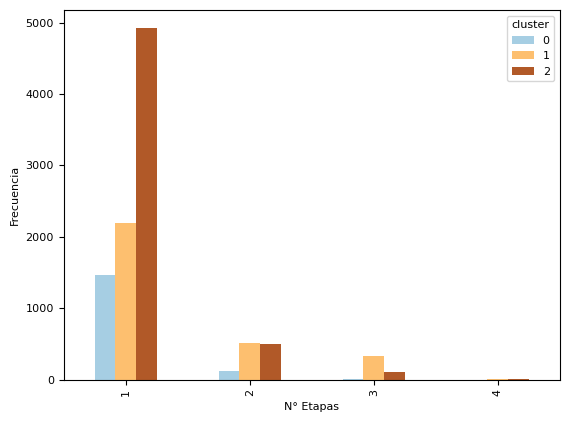

In [29]:
# Group the data by 'period' and 'group'
grouped_data = viajes_04_cl_coord.groupby(['netapa', 'cluster']).size().unstack()

# Plot the stacked bar graph
ax = grouped_data.plot(kind='bar', colormap='Paired')

# Customize the plot
ax.set_xlabel('N° Etapas')
ax.set_ylabel('Frecuencia')

# Show the plot
plt.show()

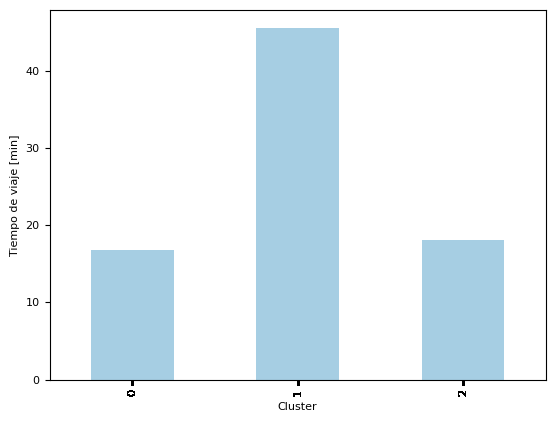

In [31]:
# Group the data by 'period' and 'group'
grouped_data = viajes_04_cl_coord[['tviaje_min', 'cluster']].groupby(['cluster']).mean().unstack()

# Plot the stacked bar graph
ax = grouped_data.plot(kind='bar', colormap='Paired')
ax.set_xticks(viajes_04_cl_coord['cluster'].values, viajes_04_cl_coord['cluster'])
# Customize the plot
ax.set_xlabel('Cluster')
ax.set_ylabel('Tiempo de viaje [min]')

# Show the plot
plt.show()

In [77]:
viajes_04_cl_coord['cluster'].value_counts(normalize=True)


2    0.544020
1    0.299314
0    0.156667
Name: cluster, dtype: float64

In [75]:
viajes_04_cl_coord[['tviaje_min', 'cluster']].groupby(['cluster']).mean().unstack()

            cluster
tviaje_min  0          16.754715
            1          45.605742
            2          18.116776
dtype: float64

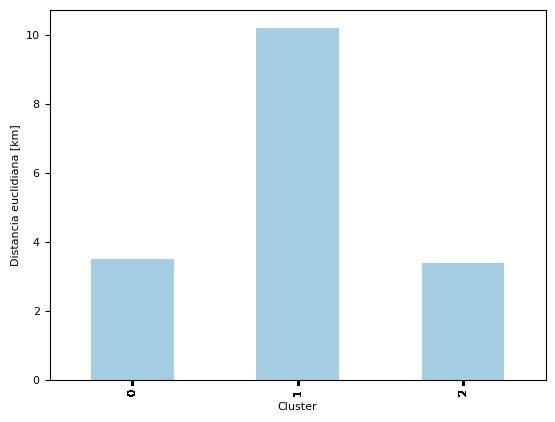

In [43]:
# Group the data by 'period' and 'group'
grouped_data = viajes_04_cl_coord[['dviajeeuclidiana_mts', 'cluster']].groupby(['cluster']).mean().unstack()
grouped_data['dviajeeuclidiana_mts'] = grouped_data['dviajeeuclidiana_mts'] / 1000
#grouped_data = grouped_data.drop(columns=['dviajeeuclidiana_mts'])

# Plot the stacked bar graph
ax = grouped_data.plot(kind='bar', colormap='Paired')
ax.set_xticks(viajes_04_cl_coord['cluster'].values, viajes_04_cl_coord['cluster'])
# Customize the plot
ax.set_xlabel('Cluster')
ax.set_ylabel('Distancia euclidiana [km]')

# Show the plot
plt.show()

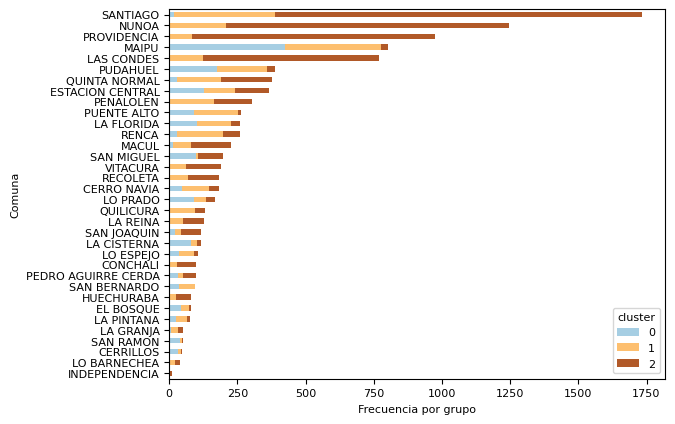

In [32]:
# Group the data by 'period' and 'group'
grouped_data = viajes_04_cl_coord.groupby(['comunasubida', 'cluster']).size().unstack()#.sort_values(ascending=False, by='comunasubida')

sorted_sum = grouped_data.sum(axis=1).sort_values(ascending=False)
sorted_indices = sorted_sum.index
sorted_grouped_data = grouped_data.loc[sorted_indices].reset_index().set_index('comunasubida')
# Plot the stacked bar graph
ax = sorted_grouped_data.plot(kind='barh', stacked=True, colormap='Paired')
#ax = sorted_df.set_index('comunasubida').plot(kind='barh', stacked=True, colormap='Paired')
# Customize the plot
ax.set_xlabel('Frecuencia por grupo')
ax.set_ylabel('Comuna')
ax.invert_yaxis()
plt.rcParams.update({'font.size': 8})
# Show the plot
plt.show()

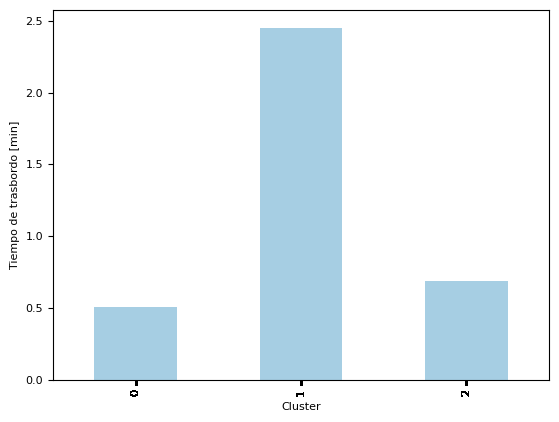

In [33]:
viajes_04_ttrasbordo = viajes_04_cl_coord
viajes_04_ttrasbordo[['ttrasbordo_1era_etapa', 'ttrasbordo_2da_etapa', 'ttrasbordo_3era_etapa']] = viajes_04_ttrasbordo[['ttrasbordo_1era_etapa', 'ttrasbordo_2da_etapa', 'ttrasbordo_3era_etapa']].fillna(0)

viajes_04_ttrasbordo['ttrasbordo_total'] = viajes_04_ttrasbordo['ttrasbordo_1era_etapa'] + viajes_04_ttrasbordo['ttrasbordo_2da_etapa'] + viajes_04_ttrasbordo['ttrasbordo_3era_etapa']
#viajes_04_ttrasbordo['ttrasbordo_total'].loc[(viajes_04_ttrasbordo!=0).any(axis=1)]
#viajes_04_ttrasbordo[viajes_04_ttrasbordo['ttrasbordo_total']!=0]

# Group the data by 'period' and 'group'
grouped_data = viajes_04_ttrasbordo[['ttrasbordo_total', 'cluster']].groupby(['cluster']).mean().unstack()

# Plot the stacked bar graph
ax = grouped_data.plot(kind='bar', colormap='Paired')
ax.set_xticks(viajes_04_cl_coord['cluster'].values, viajes_04_cl_coord['cluster'])
# Customize the plot
ax.set_xlabel('Cluster')
ax.set_ylabel('Tiempo de trasbordo [min]')

# Show the plot
plt.show()

In [34]:
viajes_04_ttrasbordo['ttrasbordo_total'].mean()

1.1895996666666666

<Axes: >

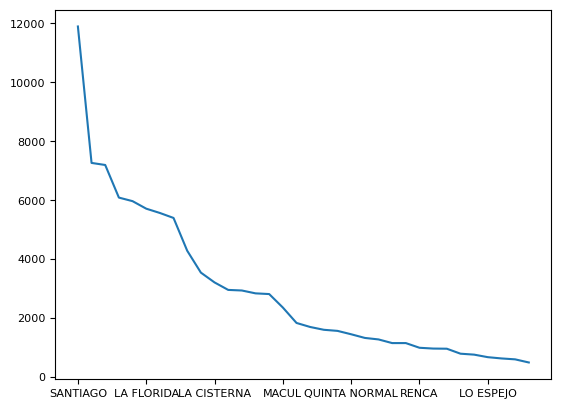

In [66]:
viajes_04_cl['comunasubida'].value_counts().plot()

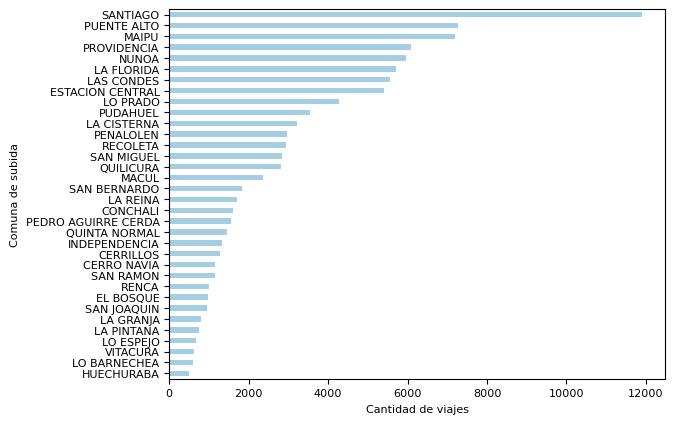

In [69]:
ax = viajes_04_cl['comunasubida'].value_counts().plot(kind='barh', stacked=True, colormap='Paired')
#ax = sorted_df.set_index('comunasubida').plot(kind='barh', stacked=True, colormap='Paired')
# Customize the plot
ax.set_xlabel('Cantidad de viajes')
ax.set_ylabel('Comuna de subida')
ax.invert_yaxis()
plt.rcParams.update({'font.size': 8})
# Show the plot
plt.show()

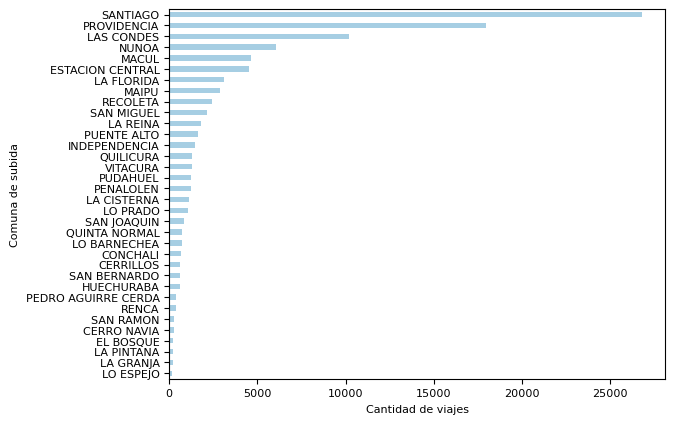

In [68]:
ax = viajes_04_cl['comunabajada'].value_counts().plot(kind='barh', stacked=True, colormap='Paired')
#ax = sorted_df.set_index('comunasubida').plot(kind='barh', stacked=True, colormap='Paired')
# Customize the plot
ax.set_xlabel('Cantidad de viajes')
ax.set_ylabel('Comuna de subida')
ax.invert_yaxis()
plt.rcParams.update({'font.size': 8})
# Show the plot
plt.show()

# Mapas

In [35]:
import geopandas as gpd
comunas = gpd.read_file('aves/data/external/censo_2017_R13/COMUNA_C17.shp')
comunas['NOM_COMUNA'] = comunas['NOM_COMUNA'].map(deaccent)


In [51]:
viajes_with_comunas = viajes_04_cl_coord.merge(comunas[['NOM_COMUNA', 'geometry']], left_on='comunasubida', right_on='NOM_COMUNA')
viajes_with_comunas = gpd.GeoDataFrame(viajes_with_comunas)

In [37]:
grouped_data_subida = viajes_04_cl_coord.groupby(['comunasubida', 'cluster']).size().unstack()#.sort_values(ascending=False, by='comunasubida')
grouped_data_subida = grouped_data_subida.merge(comunas[['NOM_COMUNA', 'geometry']], left_on='comunasubida', right_on='NOM_COMUNA')
grouped_data_subida = gpd.GeoDataFrame(grouped_data_subida).fillna(0)
#grouped_data_subida = grouped_data_subida.set_index('NOM_COMUNA').reset_index().fillna(0)

<Axes: >

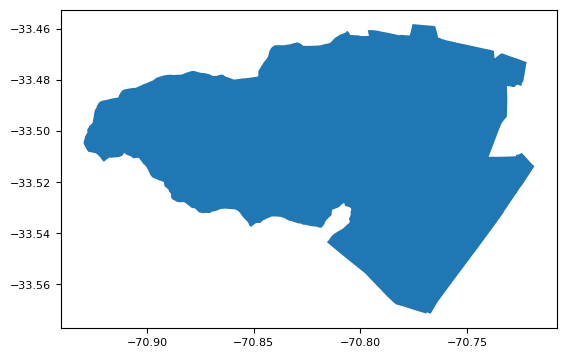

In [48]:
grouped_data_subida[grouped_data_subida['NOM_COMUNA']=='MAIPU'].plot()

In [38]:
grouped_data_bajada = viajes_04_cl_coord.groupby(['comunabajada', 'cluster']).size().unstack()#.sort_values(ascending=False, by='comunabajada')
grouped_data_bajada = grouped_data_bajada.merge(comunas[['NOM_COMUNA', 'geometry']], left_on='comunabajada', right_on='NOM_COMUNA')
grouped_data_bajada = gpd.GeoDataFrame(grouped_data_bajada).fillna(0)
#grouped_data_bajada = grouped_data_bajada.set_index('NOM_COMUNA').reset_index().fillna(0)

In [73]:
grouped_data.dtypes

NOM_COMUNA      object
0              float64
1              float64
2              float64
geometry      geometry
dtype: object

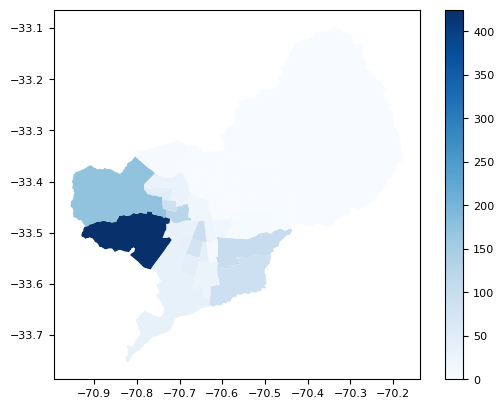

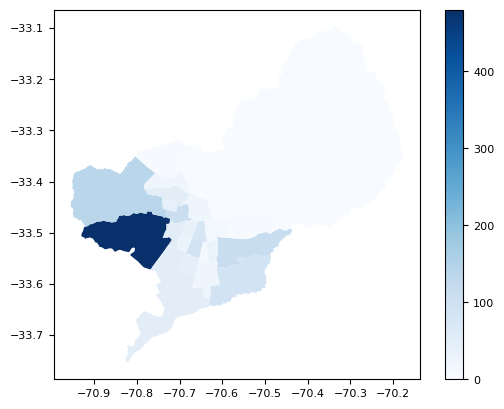

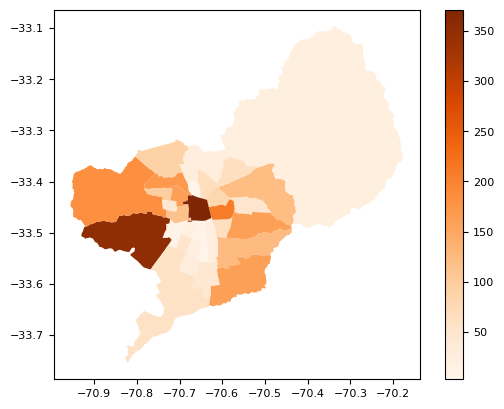

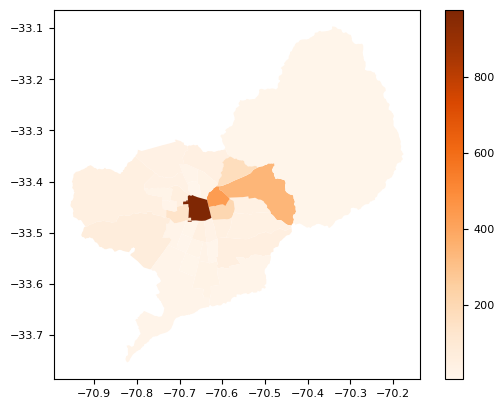

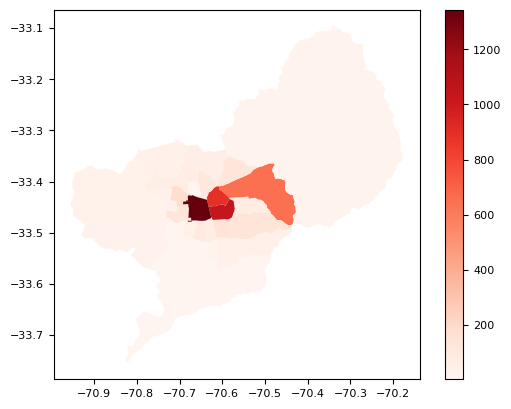

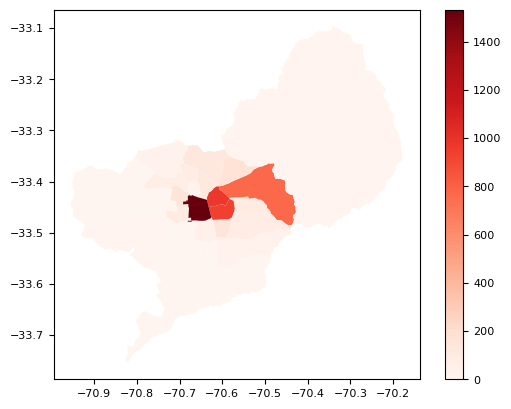

In [39]:
#grouped_data = viajes_with_comunas.groupby(['comunasubida', 'cluster']).size().unstack()#.sort_values(ascending=False, by='comunasubida')
n_clusters = 3
colors = ['Blues', 'Oranges', 'Reds']
for i in range(0, n_clusters):
      (grouped_data_subida
      .plot(grouped_data_subida[i],
            cmap=colors[i],
            legend=True)
      )
      (grouped_data_bajada
      .plot(grouped_data_bajada[i],
            cmap=colors[i],
            legend=True)
      )

# Análisis granular

In [57]:
ward_7 = AgglomerativeClustering(n_clusters=7, linkage="ward").fit(mat)
ward_7.labels_
viajes_04_ward_7 = viajes_04_cl_coord
viajes_04_ward_7['cluster'] = pd.Series(data=ward_7.labels_, index=viajes_04_cl_coord.index)

In [58]:
grouped_data_7_subida = viajes_04_ward_7.groupby(['comunasubida', 'cluster']).size().unstack()#.sort_values(ascending=False, by='comunasubida')
grouped_data_7_subida = grouped_data_7_subida.merge(comunas[['NOM_COMUNA', 'geometry']], left_on='comunasubida', right_on='NOM_COMUNA')
grouped_data_7_subida = gpd.GeoDataFrame(grouped_data_7_subida).fillna(0)
#grouped_data_7_subida = grouped_data_7_subida.set_index('NOM_COMUNA').reset_index().fillna(0)

In [59]:
grouped_data_7_bajada = viajes_04_ward_7.groupby(['comunasubida', 'cluster']).size().unstack()#.sort_values(ascending=False, by='comunasubida')
grouped_data_7_bajada = grouped_data_7_bajada.merge(comunas[['NOM_COMUNA', 'geometry']], left_on='comunasubida', right_on='NOM_COMUNA')
grouped_data_7_bajada = gpd.GeoDataFrame(grouped_data_7_bajada).fillna(0)
#grouped_data_7_bajada = grouped_data_7_bajada.set_index('NOM_COMUNA').reset_index().fillna(0)

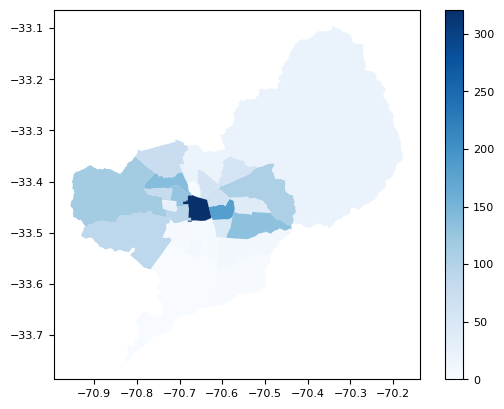

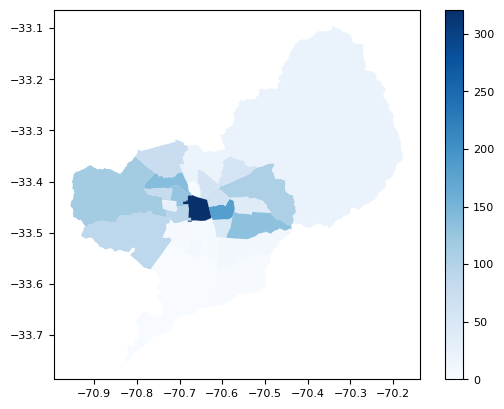

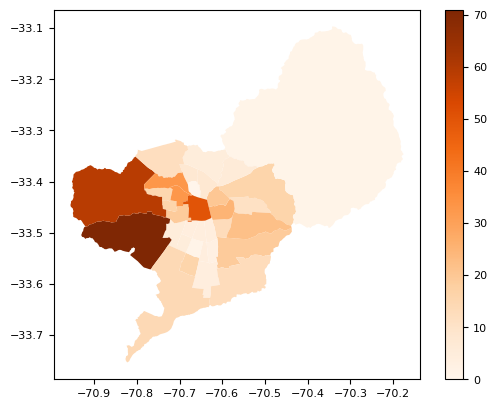

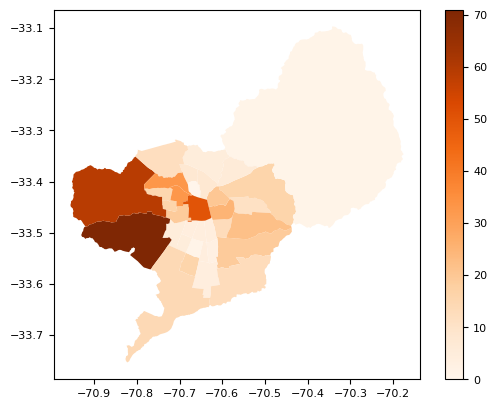

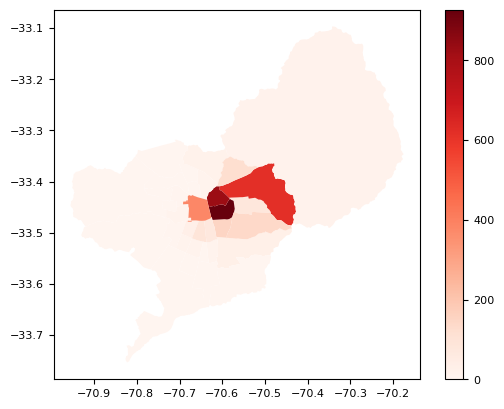

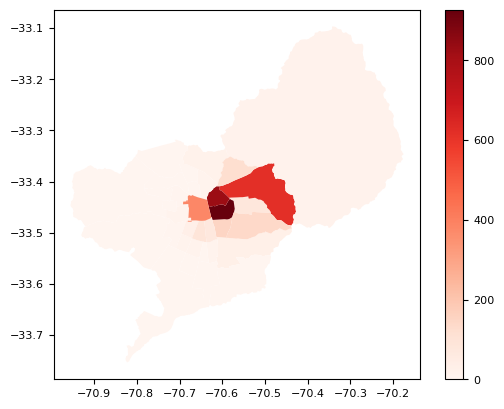

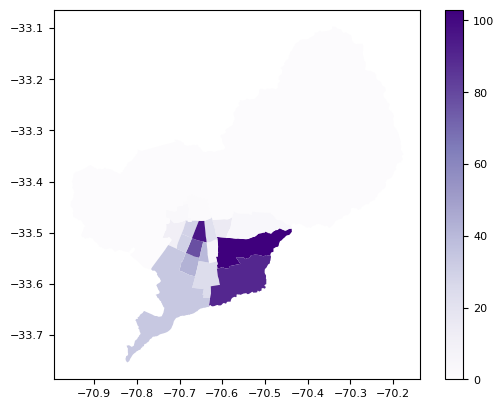

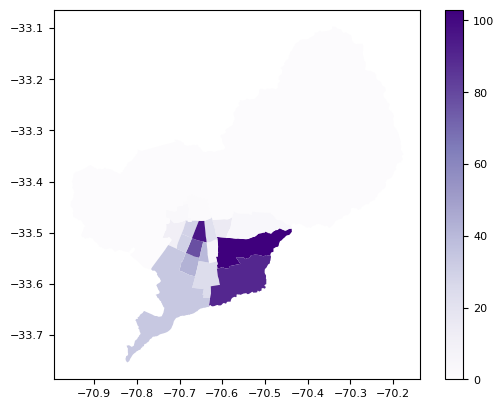

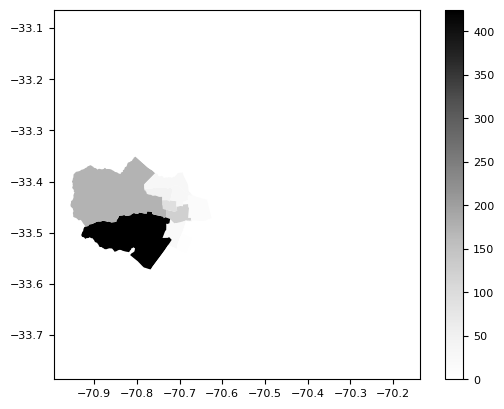

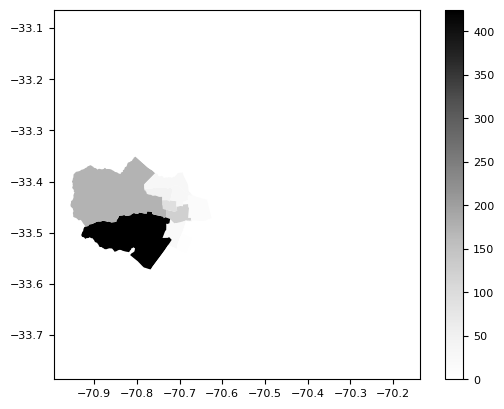

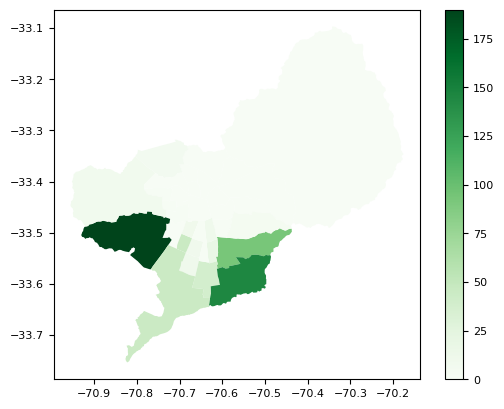

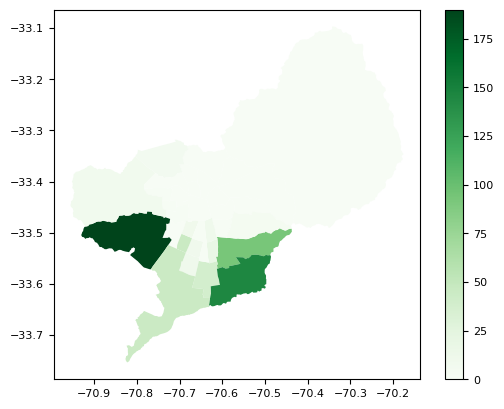

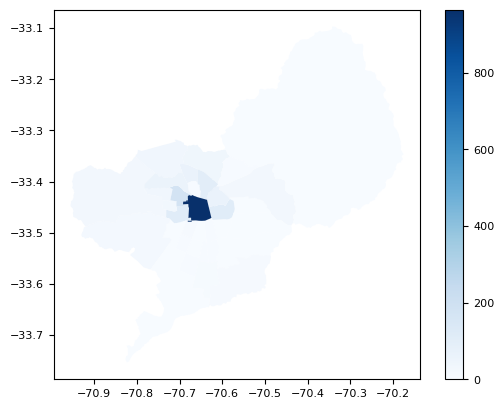

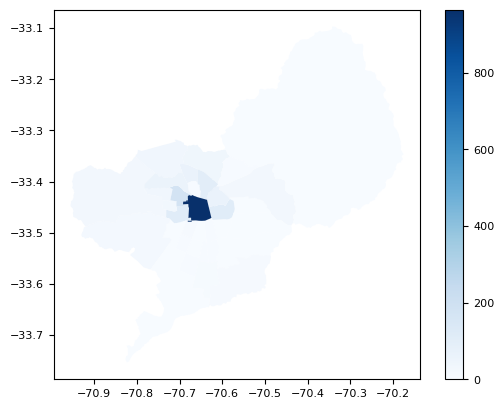

In [60]:
#grouped_data = viajes_with_comunas.groupby(['comunasubida', 'cluster']).size().unstack()#.sort_values(ascending=False, by='comunasubida')
n_clusters = 7
colors = ['Blues', 'Oranges', 'Reds', 'Purples', 'Greys', 'Greens', 'Blues']
for i in range(0, n_clusters):
      (grouped_data_7_subida
      .plot(grouped_data_7_subida[i],
            cmap=colors[i],
            legend=True)
      )
      (grouped_data_7_bajada
      .plot(grouped_data_7_bajada[i],
            cmap=colors[i],
            legend=True)
      )

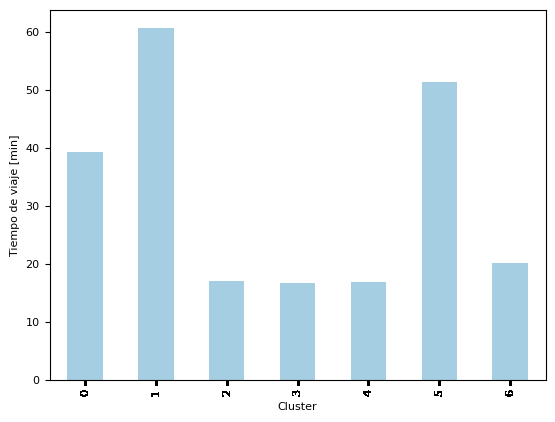

In [61]:
# Group the data by 'period' and 'group'
grouped_data = viajes_04_ward_7[['tviaje_min', 'cluster']].groupby(['cluster']).mean().unstack()

# Plot the stacked bar graph
ax = grouped_data.plot(kind='bar', colormap='Paired')
ax.set_xticks(viajes_04_ward_7['cluster'].values, viajes_04_ward_7['cluster'])
# Customize the plot
ax.set_xlabel('Cluster')
ax.set_ylabel('Tiempo de viaje [min]')

# Show the plot
plt.show()